# training classification model using linear regression

## importing libraries

In [1]:
import pandas as pd #used for handeling dataframe
import numpy as np #used for handeling arrays
import matplotlib.pyplot as plt #used for plotting graphs
import seaborn as sns #used for plotting graphs
from sklearn.preprocessing import LabelEncoder #Label encoding

In [2]:
# creating a dataframe called df
df = pd.read_csv('/content/diabetes_dataset_with_notes.csv') #reading the csv file(the dataset)

In [3]:
df

,year,gender,age,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,0,0,never,23.75,6.5,90,0
...,...,...,...,...,...,...,...,...,...,...
99995,2018,Female,33.0,0,0,never,21.21,6.5,90,0
99996,2016,Female,80.0,0,0,No Info,36.66,5.7,100,0
99997,2018,Male,46.0,0,0,ever,36.12,6.2,158,0
99998,2018,Female,51.0,0,0,not current,29.29,6.0,155,0


## dataset info (datatype)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 100000 non-null  int64  
 1   gender               100000 non-null  object 
 2   age                  100000 non-null  float64
 3   hypertension         100000 non-null  int64  
 4   heart_disease        100000 non-null  int64  
 5   smoking_history      100000 non-null  object 
 6   bmi                  100000 non-null  float64
 7   hbA1c_level          100000 non-null  float64
 8   blood_glucose_level  100000 non-null  int64  
 9   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 7.6+ MB


## dataset description

In [5]:
df.describe()

,year,age,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2018.360820,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,1.345239,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,2015.000000,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,2019.000000,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,2019.000000,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,2019.000000,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,2022.000000,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


## checking for missing value sums

In [6]:
df.isnull().sum() #isnull is used to check the null values and .sum() is used in pipeline to get the number of null values

,0
year,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
hbA1c_level,0
blood_glucose_level,0
diabetes,0


In [7]:
df.isnull().sum().sum()

np.int64(0)

## checking for duplicated values

In [8]:
print(df.duplicated().sum())


2692


### since we found 2692 duplicated values we are going to drop those rows to reduce the redundency

In [9]:
df.drop_duplicates(inplace=True) # we are using inplace = True here to make changes to our current dataframe rather than creating a new dataframe

In [10]:
df

,year,gender,age,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,0,0,never,23.75,6.5,90,0
...,...,...,...,...,...,...,...,...,...,...
99995,2018,Female,33.0,0,0,never,21.21,6.5,90,0
99996,2016,Female,80.0,0,0,No Info,36.66,5.7,100,0
99997,2018,Male,46.0,0,0,ever,36.12,6.2,158,0
99998,2018,Female,51.0,0,0,not current,29.29,6.0,155,0


## about dataset

The dataset contains 100,000 records with 10 features related to diabetes diagnosis. The key attributes include:

- year: Year of data collection
- gender: Patient's gender (Male/Female)
- age: Age of the patient
- hypertension: Whether the patient has hypertension (0 = No, 1 = Yes)
- heart_disease: Presence of heart disease (0 = No, 1 = Yes)
- smoking_history: Smoking status (e.g., never, former, current)
- bmi: Body Mass Index
- hbA1c_level: Hemoglobin A1c level (used for diabetes monitoring)
- blood_glucose_level: Measured blood glucose level
- diabetes: Target variable indicating diabetes presence (0 = No, 1 = Yes) (target variable)

In [11]:
print(df.duplicated().sum())

0


# basic Exploratory Data Analysis

## countplot for our target variable

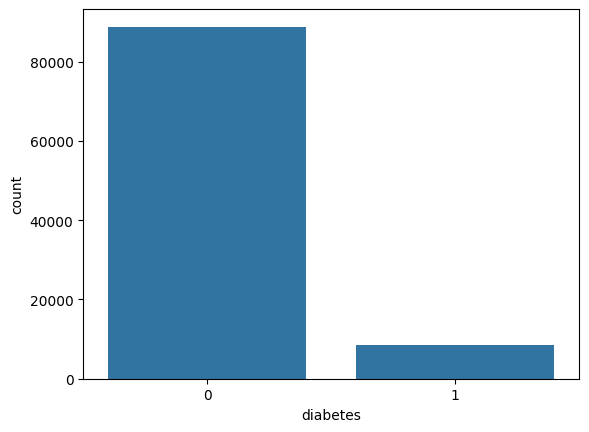

In [12]:
sns.countplot(x=df["diabetes"]) #using seaborne to plot the target variable
plt.show()

### the dataset has severe class imbalance, where the 0 (no diabetes) is over 80k while the 1 (diabetes) is barely around 10k

this can be fixed by various techniques like
- SMOTE (Synthetic Minority Over-sampling Technique)
- Undersampling the Majority Class
- using data Augmentation for minority class

etc,

but here we will use the dataset as it is

## histogram plot for our numerical values

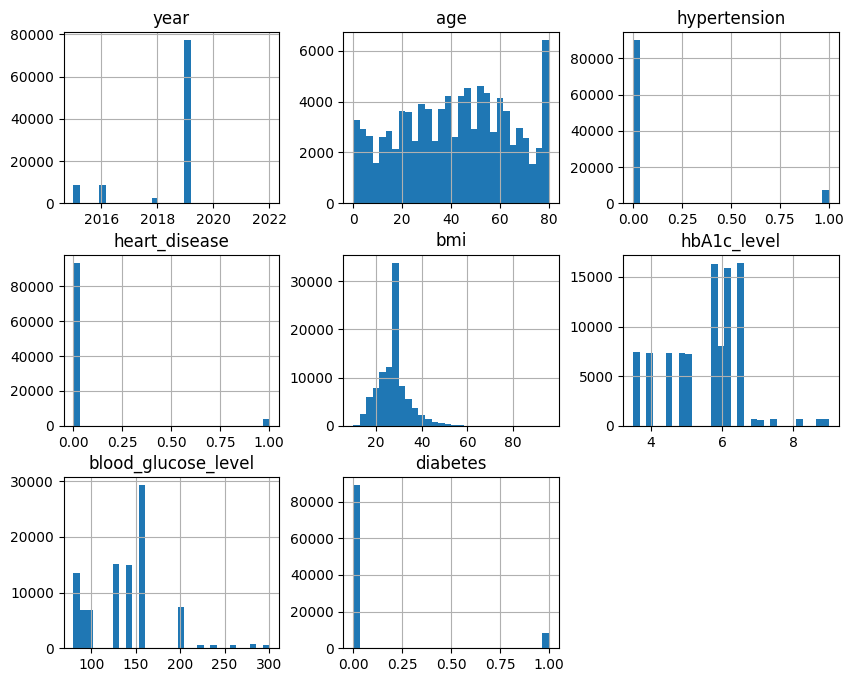

In [13]:
df.hist(figsize=(10, 8), bins=30)
plt.show()


## label encoding

-Label encoding done to convert the categorical labels like male, female into numbers 0 and1, this is so that machine learning models can understand them. since the Computers work with numbers, not words this step is necessary for training models.









In [14]:
# LabelEncoder object that we imported from sklearn
le = LabelEncoder()

# label encoding the gender and smoking_history (categorical values)
df['gender'] = le.fit_transform(df['gender'])
df['smoking_history'] = le.fit_transform(df['smoking_history'])



In [15]:
df

,year,gender,age,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,0,32.0,0,0,4,27.32,5.0,100,0
1,2015,0,29.0,0,0,4,19.95,5.0,90,0
2,2015,1,18.0,0,0,4,23.76,4.8,160,0
3,2015,1,41.0,0,0,4,27.32,4.0,159,0
4,2016,0,52.0,0,0,4,23.75,6.5,90,0
...,...,...,...,...,...,...,...,...,...,...
99995,2018,0,33.0,0,0,4,21.21,6.5,90,0
99996,2016,0,80.0,0,0,0,36.66,5.7,100,0
99997,2018,1,46.0,0,0,2,36.12,6.2,158,0
99998,2018,0,51.0,0,0,5,29.29,6.0,155,0


In [16]:
df[['gender','smoking_history']]

,gender,smoking_history
0,0,4
1,0,4
2,1,4
3,1,4
4,0,4
...,...,...
99995,0,4
99996,0,0
99997,1,2
99998,0,5


## correlation

- correlation measure the relationship between two variables,
how much one variable would change if other were to be changed

- Positive correlation means that when one variable increases, the other also increases.
- Negative correlation means that when one variable increases, the other decreases.

In [17]:
correlation = df.corr() # using corr() to compute the correations in the dataset

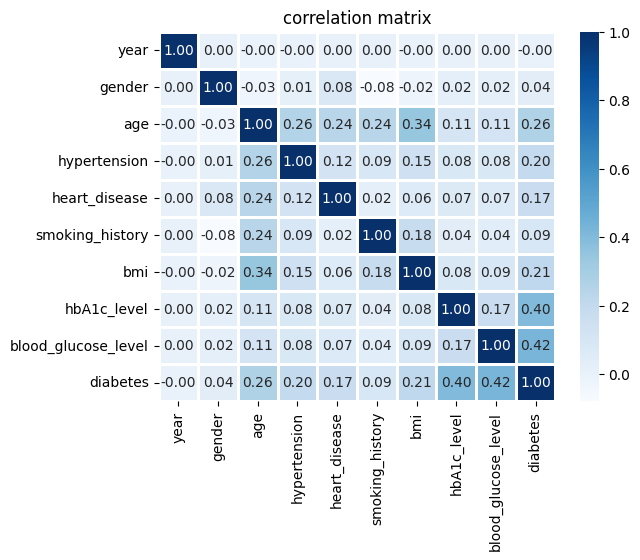

In [18]:
sns.heatmap(correlation, annot=True, fmt ='.2f', linewidths=2, cmap='Blues') #plotting the correlations claculated using heatmaps from seaborn library
#annot = true is used to display the number on each correaltion cell of the heatmap
#fmt = .2f formats the value of correation to 2 decimal places
#linewidths to give the line with of 2 pixels
#cmap is colour map and I have set it to blues
plt.title('correlation matrix')
plt.show()

## normalizing using StandarScaler

StandardScaler transforms the data so that it has a mean of 0 and a standard deviation of 1, it adjusts data so that it has a common scale.
This helps models learn better, especially when features have very different ranges

In [19]:
# importing the StandarScaler from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df[['age','hypertension','heart_disease','bmi','hbA1c_level','blood_glucose_level']] = scaler.fit_transform(df[['age','hypertension','heart_disease','bmi','hbA1c_level','blood_glucose_level']])

In [20]:
df

,year,gender,age,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,0,-0.436527,-0.28844,-0.205097,4,-0.000161,-0.495363,-0.934004,0
1,2015,0,-0.570018,-0.28844,-0.205097,4,-1.095668,-0.495363,-1.178824,0
2,2015,1,-1.059484,-0.28844,-0.205097,4,-0.529334,-0.681898,0.534915,0
3,2015,1,-0.036055,-0.28844,-0.205097,4,-0.000161,-1.428038,0.510433,0
4,2016,0,0.453411,-0.28844,-0.205097,4,-0.530820,0.903649,-1.178824,0
...,...,...,...,...,...,...,...,...,...,...
99995,2018,0,-0.392031,-0.28844,-0.205097,4,-0.908376,0.903649,-1.178824,0
99996,2016,0,1.699325,-0.28844,-0.205097,0,1.388175,0.157509,-0.934004,0
99997,2018,1,0.186429,-0.28844,-0.205097,2,1.307907,0.623847,0.485951,0
99998,2018,0,0.408914,-0.28844,-0.205097,5,0.292668,0.437312,0.412505,0


## import the train_test_split from sklearn.model_selection

In [21]:
from sklearn.model_selection import train_test_split

Understanding the `target` and `feature` vairables

In machine learning, data is divided into features and the target variable to help the model learn patterns.

- Feature variables are the input data (like age, weight, or blood sugar level) that the model uses to make predictions.
- The target variable is what we want to predict (like whether a person has diabetes or not).
-The model learns the relationship between features and the target to make accurate predictions on new data.

In [22]:
x = df.drop(columns=['diabetes','year'])
# I have dropped 2 columns here, diabetes which is our target variable.
# and i have dropped year becaues i didn't find it irrelavent to what we are classifying
# and the feature variable are store in x


y = df['diabetes'] # now the target variable 'diabetes' is stored in y

we are splitting the dataset into two subsets `train` and `test`
- the train data is used to fit/ train the machine learning algorithm
- the test data is used to evaluate the model which has been trained on the train data

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=9, stratify=y)
'''
random state controls the randomness of operations like train-test splitting Setting a fixed random state (random_state=9)
ensures that the same data split or random selection happens every time.

The stratify parameter is used in train-test splitting to maintain the same proportion of classes in both sets.
It ensures that the distribution of the target variable (labels) remains the same in training and testing data.

'''

'\nrandom state controls the randomness of operations like train-test splitting Setting a fixed random state (random_state=9) \nensures that the same data split or random selection happens every time.\n\nThe stratify parameter is used in train-test splitting to maintain the same proportion of classes in both sets.\nIt ensures that the distribution of the target variable (labels) remains the same in training and testing data.\n\n'

- x_train and x_test contains the train and test data of feature variables
- y_train and y_test contain the target variable (diabetes)

### countplot for stratified split

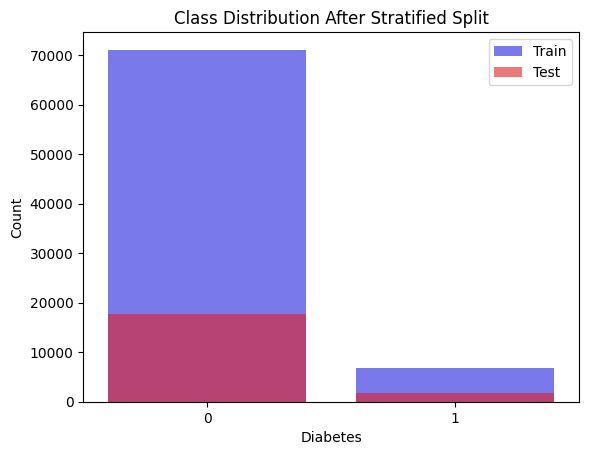

In [24]:
sns.countplot(x=y_train, label="Train", color="blue", alpha=0.6)
sns.countplot(x=y_test, label="Test", color="red", alpha=0.6)

plt.xlabel("Diabetes")
plt.ylabel("Count")
plt.title("Class Distribution After Stratified Split")
plt.legend(["Train", "Test"])
plt.show()

## importing LogisticRegression algorithm from sklearn.linear_model

In [25]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression(solver='saga',max_iter=500, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test) # evaluating the model using the test data and stroing the classified(predicted) values in the y_pred




the parameter we are passing in the LogisticRegression is called hyperparameters

A **hyperparameter** is a setting that we choose before training a machine learning model, and it controls how the model learns.

hyperparameter used here:
- **solver='saga'** : Defines the optimization algorithm used to update the model’s parameters. 'saga' is good for large datasets and supports regularization.
- **max_iter=500** : Sets the maximum number of iterations the model will run to find the best solution. A higher value allows more training but takes longer.
- **random_state=42** : Ensures reproducibility by keeping the randomness consistent, so results remain the same each time you run the code.

**Fitting** in machine learning means training a model on data so it can learn patterns and relationships.

The model adjusts itself based on the training data to make predictions.
During fitting, the model finds the best values for its internal settings (parameters) to minimize errors.

notice that we are using x_train (training data of feature variables)
and y_train (training data for target variable)

#  model evaluation

In [26]:
from sklearn.metrics import accuracy_score, classification_report

In [27]:
print("accuracy of the model", accuracy_score(y_test, y_pred)*100)#accuracy of the model


accuracy of the model 95.87914911108828


In [28]:
print("classification report:")
print(classification_report(y_test, y_pred))

classification report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     17765
           1       0.86      0.63      0.73      1697

    accuracy                           0.96     19462
   macro avg       0.91      0.81      0.85     19462
weighted avg       0.96      0.96      0.96     19462



In [29]:
from sklearn.metrics import confusion_matrix, classification_report


In [30]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)

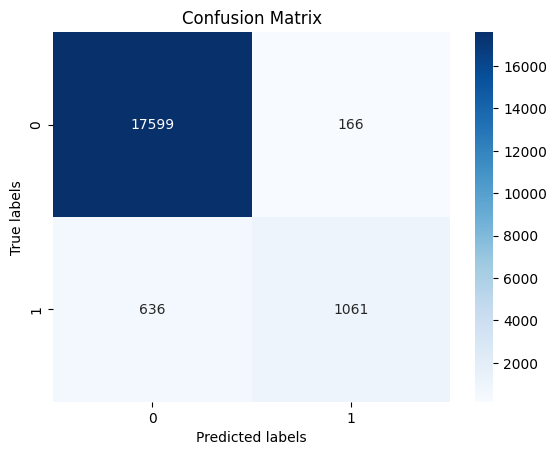

In [31]:
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# references

- pandas : https://pandas.pydata.org/docs/
- matplotlib : https://matplotlib.org/stable/users/index.html
- seaborn: https://seaborn.pydata.org/
- scikitlearn: https://scikit-learn.org/stable/supervised_learning.html

📝Created by Bhuvan S  
**6th Semester | CodeCatalyst | Technology**  
Feel free to reach out for any questions!
